In [1]:
import os
import time

# Self-code imports
from polytopes.model.chord import Chord
import polytopes.data_manipulation as dm

#Generic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Segment size distribution

[]

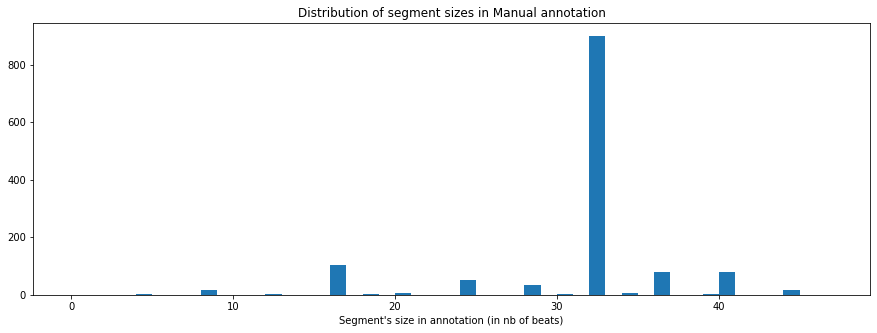

In [2]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\MIREX10"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"

# Files to load: .seq
all_mirex_ten = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\final_bimbot_al\\"
all_manual = []
for file in os.listdir(all_mirex_ten):
    bag_of_words = file.split(".")
    if bag_of_words[-1] == "seq":
        if bag_of_words[-2] == "manual":
            all_manual.append(file)

all_res = []
distrib_segments = []
for song in all_manual:
    song_number = song.split(".")[0]
    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(all_mirex_ten + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split()
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    for fst, snd in zip(annotation[:-1], annotation[1:]):
        distrib_segments.append(snd - fst)
    
plt.figure(figsize=(15,5))
plt.hist(distrib_segments, bins = range(48))
plt.xlabel("Segment's size in annotation (in nb of beats)")
plt.title("Distribution of segment sizes in Manual annotation")
plt.plot()

# Segmentation with segment every 32 beats

In [3]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\MIREX10"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"

# Files to load: .seq
all_mirex_ten = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\final_bimbot_al\\"
all_manual = []
for file in os.listdir(all_mirex_ten):
    bag_of_words = file.split(".")
    if bag_of_words[-1] == "seq":
        if bag_of_words[-2] == "manual":
            all_manual.append(file)

all_res = []
distrib_segments = []
for song in all_manual:
    bag_of_chords = dm.flowify_song(all_mirex_ten + song)

    frontiers = [i for i in range(0,len(bag_of_chords), 32)]
    
    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    song_number = song.split(".")[0]
    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(all_mirex_ten + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split()
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    prec, rec, fmes = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, window_length = 0.5)
    all_res.append([prec, rec, fmes])

results = np.array(all_res)
prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
print("Prec: {}, Rec: {} Fmes: {}".format(prec, rap, fmes))

Prec: 0.3597, Rec: 0.3615 Fmes: 0.3601
